## Inicialización

## Carga los datos

El conjunto de datos se almacena en la carpeta `/datasets/faces/` 
- La carpeta `final_files` con 7600 fotos 
- El archivo `labels.csv` con etiquetas, con dos columnas: `file_name` y `real_age` 
Dado que el número de archivos de imágenes es bastante elevado, se recomienda evitar leerlos todos a la vez, ya que esto consumiría muchos recursos computacionales. Te recomendamos crear un generador con ImageDataGenerator. Este método se explicó en el capítulo 3, lección 7 de este curso.

El archivo de etiqueta se puede cargar como un archivo CSV habitual.

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

import pandas as pd
import matplotlib.pyplot as plt


In [2]:
datagen = ImageDataGenerator(validation_split=0.25, rescale=1/255.)

train_datagen_flow = datagen.flow_from_directory(
    "/datasets/faces/",
    target_size=(150,150),
    batch_size=16,
    class_mode="sparse",
    subset='training',
    seed=12345)
                                                
val_datagen_flow = datagen.flow_from_directory(
    "/datasets/faces/",
    target_size=(150,150),
    batch_size=16,
    class_mode="sparse",
    subset="validation",
    seed=12345)

features, target = next(train_datagen_flow)


Found 5694 images belonging to 1 classes.
Found 1897 images belonging to 1 classes.


In [3]:
features

array([[[[0.8470589 , 0.85098046, 0.8313726 ],
         [0.8470589 , 0.85098046, 0.8313726 ],
         [0.8470589 , 0.85098046, 0.8313726 ],
         ...,
         [0.19607845, 0.1764706 , 0.10196079],
         [0.18823531, 0.16862746, 0.09411766],
         [0.21176472, 0.19215688, 0.11764707]],

        [[0.8470589 , 0.85098046, 0.8313726 ],
         [0.8470589 , 0.85098046, 0.8313726 ],
         [0.8470589 , 0.85098046, 0.8313726 ],
         ...,
         [0.18431373, 0.16078432, 0.10588236],
         [0.22352943, 0.20000002, 0.14509805],
         [0.21176472, 0.18823531, 0.13333334]],

        [[0.8470589 , 0.85098046, 0.8313726 ],
         [0.8470589 , 0.85098046, 0.8313726 ],
         [0.8470589 , 0.85098046, 0.8313726 ],
         ...,
         [0.16078432, 0.12156864, 0.1137255 ],
         [0.18039216, 0.14117648, 0.13333334],
         [0.17254902, 0.13333334, 0.1254902 ]],

        ...,

        [[0.46274513, 0.45882356, 0.4431373 ],
         [0.46274513, 0.45882356, 0.4431373 ]

In [4]:
target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

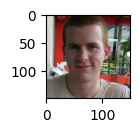

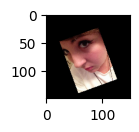

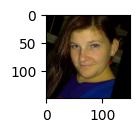

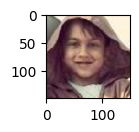

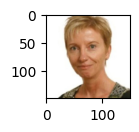

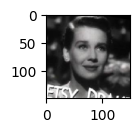

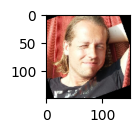

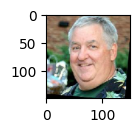

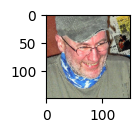

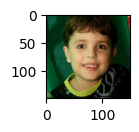

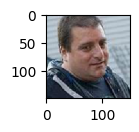

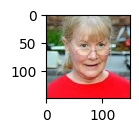

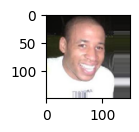

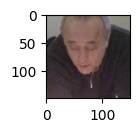

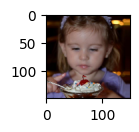

In [5]:
for i in range(15):
    fig = plt.figure(figsize=(5,5))
    fig.add_subplot(4,4,i+1)
    plt.imshow(features[i])
    plt.show()

## EDA

In [6]:
labels = pd.read_csv('/datasets/faces/labels.csv')
print(f"Número total de imágenes: {len(labels)}")
print(f"Columnas disponibles: {labels.columns.tolist()}")

Número total de imágenes: 7591
Columnas disponibles: ['file_name', 'real_age']


In [7]:
labels.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


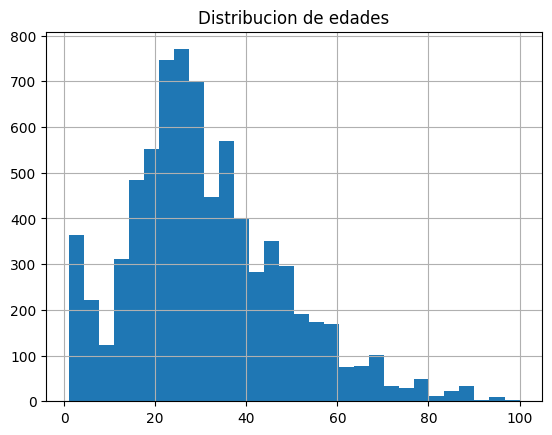

In [8]:
# Distribucion de edades
labels['real_age'].hist(bins=30)
plt.title('Distribucion de edades')
plt.show()

In [9]:
# ¿Qué edades tenemos?
print(labels['real_age'].describe())

count    7591.000000
mean       31.201159
std        17.145060
min         1.000000
25%        20.000000
50%        29.000000
75%        41.000000
max       100.000000
Name: real_age, dtype: float64


### Conclusiones

## Modelado

Define las funciones necesarias para entrenar tu modelo en la plataforma GPU y crea un solo script que las contenga todas junto con la sección de inicialización.

Para facilitar esta tarea, puedes definirlas en este notebook y ejecutar un código listo en la siguiente sección para componer automáticamente el script.

Los revisores del proyecto también verificarán las definiciones a continuación, para que puedan comprender cómo construiste el modelo.

In [10]:
import pandas as pd
import numpy as np 

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [11]:
target_read = pd.read_csv("/datasets/faces/labels.csv")
target_read.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [12]:
from sklearn.model_selection import train_test_split
train_labels, test_labels = train_test_split(target_read, test_size=0.25)

In [13]:
def load_train(path):
    
    """
    Carga la parte de entrenamiento del conjunto de datos desde la ruta.
    """
    
    # coloca tu código aquí
    train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)

    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=train_labels,
        directory=path,
        x_col="file_name",
        y_col="real_age",
        target_size=(224, 224),
        batch_size=32,
        subset='training',
        seed=12345,
        class_mode="raw",)
 

    return train_gen_flow

In [ ]:

train_img = load_train('/datasets/faces/final_files/')
train_img = np.array(train_img)
x_train = train_img["file_name"]
y_train = train_img["real_age"]


Found 4270 validated image filenames.


In [ ]:
def load_test(path):
    
    """
    Carga la parte de validación/prueba del conjunto de datos desde la ruta
    """
    
    # coloca tu código aquí
    test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)

    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=test_labels,
        directory=path,
        x_col="file_name",
        y_col="real_age",
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation',
        seed=12345)

    return test_gen_flow

In [ ]:
test_img=load_test('/datasets/faces/final_files/')
test_img = np.array(test_img)
x_test = test_img["file_name"]
y_test = test_img["real_age"]

In [ ]:
def create_model(input_shape):
    
    """
    Define el modelo
    """
    
    # coloca tu código aquí
    model = Sequential()
    model.add(ResNet50(weigths="imagenet",
                       input_shape = input_sahpe,
                       include_top= False
                       ))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation="linear"))
    model.add(Droupout(0.9))
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['acc'])

    return model

In [ ]:
model = create_model(224, 224, 3)
model

In [ ]:
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):

    """
    Entrena el modelo dados los parámetros
    """
    
    # # coloca tu código aquí
    model.fit(x_train,
              y_train,
              epochs,
              steps_per_epoch,
              batch_size,
              validation_steps)

    return model

In [ ]:
model = train_model(model, train, test)
model

## Prepara el script para ejecutarlo en la plataforma GPU

Una vez que hayas definido las funciones necesarias, puedes redactar un script para la plataforma GPU, descargarlo a través del menú "File|Open..." (Archivo|Abrir) y cargarlo más tarde para ejecutarlo en la plataforma GPU.

Nota: el script debe incluir también la sección de inicialización. A continuación se muestra un ejemplo.

In [ ]:
# prepara un script para ejecutarlo en la plataforma GPU

init_str = """
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

def load_train(path):
    
    train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)

    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=train_labels,
        directory=path,
        x_col="file_name",
        y_col="real_age",
        target_size=(224, 224),
        batch_size=32,
        subset='training',
        seed=12345,
        class_mode="raw",)

    return train_gen_flow
    

def load_test(path):
    
    test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)

    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=test_labels,
        directory=path,
        x_col="file_name",
        y_col="real_age",
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation',
        seed=12345)

    return test_gen_flow
    
def create_model(input_shape):
    
    model = Sequential()
    model.add(ResNet50(weigths="imagenet",
                       input_shape = input_sahpe,
                       include_top= False
                       ))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation="linear"))
    model.add(Droupout(0.9))
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['acc'])


    return model
    
    
def train_model(model, x_train, y_train, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):

    model.fit(x_train,
              y_train,
              epochs,
              steps_per_epoch,
              batch_size,
              validation_steps)
    

    return model
"""

import inspect

with open('run_model_on_gpu.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')
    

### El resultado

Coloca el resultado de la plataforma GPU como una celda Markdown aquí.

## Conclusiones


# Comentario General del Revisor

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Felicidades! Tu proyecto está <b>aprobado</b>. Has hecho un excelente trabajo cargando los datos, realizando el análisis exploratorio y visualizando correctamente la distribución de edades. El modelado presenta una buena estructura inicial, y aunque hay algunos errores menores en la definición del modelo y el entrenamiento, ¡lo esencial está bien encaminado!

### ✅ Aspectos positivos:

* **Carga y limpieza de datos**: Se realizó correctamente.
* **Análisis exploratorio (EDA)**: Incluiste estadísticas descriptivas y visualización, ¡muy bien!
* **Uso de generadores**: Implementación de `ImageDataGenerator` para dividir el dataset.
* **Preparación para GPU**: Aunque es opcional, es genial ver que intentaste dejar preparado un script para ejecución remota.

### ℹ️ Nota sobre GPU:

La preparación del script para la plataforma GPU es **opcional**, por lo que no afecta la aprobación del proyecto. Sin embargo, te animamos a seguir puliendo esa parte si te interesa llevar tu proyecto a un entorno de entrenamiento acelerado.

### 📚 Áreas para seguir desarrollando:

* Corrige pequeños errores tipográficos (`weights`, `Dropout`, `input_shape`).
* Revisa el tipo de pérdida y métrica usada, ya que se trata de un problema de regresión.
* Asegúrate de usar los generadores directamente en `model.fit()`.

¡Sigue adelante con esta energía y atención al detalle! Tu proyecto tiene una base sólida y estás en muy buen camino para avanzar en el mundo del deep learning. 💪🚀😊

</div>
